In [ ]:
# =========================
# 📌 Milestone 1: Dataset Collection & Preprocessing
# =========================

import torch
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import json
from google.colab import drive

# ✅ Step 1: Mount Google Drive
drive.mount('/content/drive')

# ✅ Step 2: Set dataset path (already in Drive)
data_path = "/content/drive/MyDrive/archive/PlantVillage"

# ✅ Step 3: Define transforms (resize, normalize, augmentation)
transform = transforms.Compose([
    transforms.Resize((128, 128)),                # resize all images
    transforms.RandomHorizontalFlip(),            # augmentation
    transforms.RandomRotation(20),                # augmentation
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],    # normalize for RGB
                         std=[0.5, 0.5, 0.5])
])

# ✅ Step 4: Load dataset using ImageFolder
dataset = datasets.ImageFolder(root=data_path, transform=transform)

# ✅ Step 5: Create train/validation split (80/20)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# ✅ Step 6: Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

# ✅ Step 7: Class mapping
idx_to_class = {v: k for k, v in dataset.class_to_idx.items()}
print("Total Classes:", len(idx_to_class))
print("Class Mapping:", idx_to_class)

# ✅ Step 8: Save class mapping for later use
mapping_path = "/content/drive/MyDrive/class_mapping.json"
with open(mapping_path, "w") as f:
    json.dump(idx_to_class, f)
print(f"Class mapping saved at {mapping_path}")

# ✅ Step 9: Check a batch
images, labels = next(iter(train_loader))
print("Batch of images shape:", images.shape)
print("Batch of labels shape:", labels.shape)


Mounted at /content/drive
Total Classes: 15
Class Mapping: {0: 'Pepper__bell___Bacterial_spot', 1: 'Pepper__bell___healthy', 2: 'Potato___Early_blight', 3: 'Potato___Late_blight', 4: 'Potato___healthy', 5: 'Tomato_Bacterial_spot', 6: 'Tomato_Early_blight', 7: 'Tomato_Late_blight', 8: 'Tomato_Leaf_Mold', 9: 'Tomato_Septoria_leaf_spot', 10: 'Tomato_Spider_mites_Two_spotted_spider_mite', 11: 'Tomato__Target_Spot', 12: 'Tomato__Tomato_YellowLeaf__Curl_Virus', 13: 'Tomato__Tomato_mosaic_virus', 14: 'Tomato_healthy'}
Class mapping saved at /content/drive/MyDrive/class_mapping.json
Batch of images shape: torch.Size([32, 3, 128, 128])
Batch of labels shape: torch.Size([32])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📊 Total Images: 22411
🌿 Number of Classes: 15
✅ Classes Example: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot'] ...
📂 Training Images: 17928
📂 Validation Images: 4483
🔑 Class Index Mapping Example:
[(0, 'Pepper__bell___Bacterial_spot'), (1, 'Pepper__bell___healthy'), (2, 'Potato___Early_blight'), (3, 'Potato___Late_blight'), (4, 'Potato___healthy')]


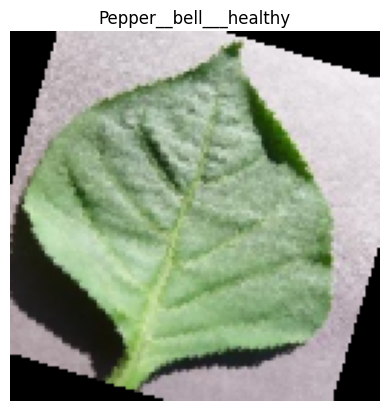

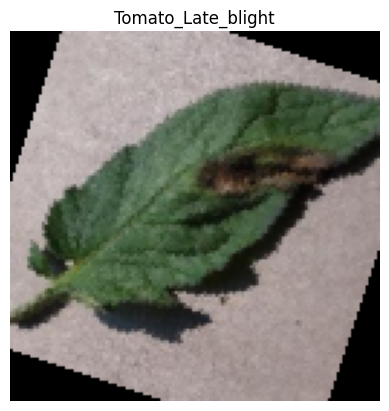

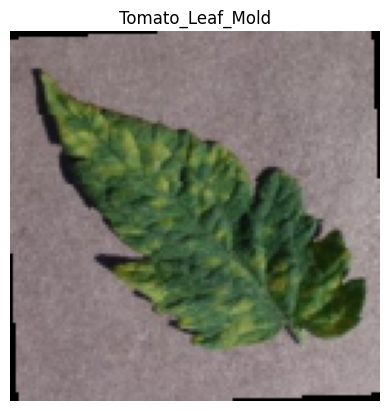

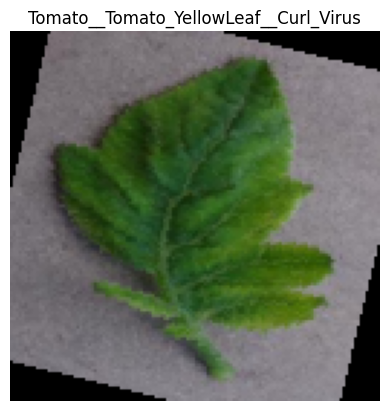

In [ ]:
# =========================
# 🌱 Milestone 1: Dataset Collection & Preprocessing
# =========================

# ✅ Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# ✅ Step 2: Import Libraries
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader
import matplotlib.pyplot as plt

# ✅ Step 3: Path to Dataset in Google Drive
# Example: "/content/drive/MyDrive/archive/PlantVillage"
data_path = "/content/drive/MyDrive/archive/PlantVillage"   # <-- change if your dataset is elsewhere

# ✅ Step 4: Define Transforms (Preprocessing + Augmentation)
transform = transforms.Compose([
    transforms.Resize((128, 128)),               # Resize to 128x128
    transforms.RandomHorizontalFlip(),           # Data augmentation
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)  # Normalize for RGB images
])

# ✅ Step 5: Load Dataset
dataset = datasets.ImageFolder(root=data_path, transform=transform)
num_classes = len(dataset.classes)
print(f"📊 Total Images: {len(dataset)}")
print(f"🌿 Number of Classes: {num_classes}")
print(f"✅ Classes Example: {dataset.classes[:10]} ...")

# ✅ Step 6: Create Train/Validation Split (80% Train, 20% Validation)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print(f"📂 Training Images: {len(train_dataset)}")
print(f"📂 Validation Images: {len(val_dataset)}")

# ✅ Step 7: Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

# ✅ Step 8: Save Class Mappings for Later Prediction
idx_to_class = {v: k for k, v in dataset.class_to_idx.items()}
print("🔑 Class Index Mapping Example:")
print(list(idx_to_class.items())[:5])

# ✅ Step 9: Visualize Sample Images
def imshow(img, title):
    img = img / 2 + 0.5  # unnormalize
    np_img = img.numpy().transpose((1, 2, 0))
    plt.imshow(np_img)
    plt.title(title)
    plt.axis("off")
    plt.show()

# Get a batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show first 4 images
for i in range(4):
    imshow(images[i], title=idx_to_class[labels[i].item()])


In [ ]:
# =========================
# 🌱 Milestone 1 (Extended): Save Metadata, Treatment Mapping, Symptom Texts
# =========================

import json
import csv
import pandas as pd

# 📂 Output folder
output_dir = "/content/milestone1_output"
os.makedirs(output_dir, exist_ok=True)

# ✅ 1. Save Class Counts
class_counts = {}
for class_name in dataset.classes:
    class_counts[class_name] = len([
        f for f in os.listdir(os.path.join(data_path, class_name))
        if f.lower().endswith((".jpg", ".png", ".jpeg"))
    ])

with open(os.path.join(output_dir, "class_counts.json"), "w") as f:
    json.dump(class_counts, f, indent=4)

print("📊 Saved class_counts.json")

# ✅ 2. Save Train/Validation Splits to CSV
train_files = [(dataset.samples[i][0], idx_to_class[dataset.samples[i][1]]) for i in train_dataset.indices]
val_files = [(dataset.samples[i][0], idx_to_class[dataset.samples[i][1]]) for i in val_dataset.indices]

pd.DataFrame(train_files, columns=["filepath", "label"]).to_csv(
    os.path.join(output_dir, "train_files.csv"), index=False
)
pd.DataFrame(val_files, columns=["filepath", "label"]).to_csv(
    os.path.join(output_dir, "val_files.csv"), index=False
)

print("📂 Saved train_files.csv and validation_files.csv")

# ✅ 3. Save Class Mapping
with open(os.path.join(output_dir, "class_indices.json"), "w") as f:
    json.dump(idx_to_class, f, indent=4)

print("🔑 Saved class_indices.json")

# ✅ 4. Create Disease → Treatment Mapping (extend as needed)
disease_treatment_mapping = {
    "Pepper__bell___Bacterial_spot": "Apply copper-based fungicide and avoid overhead watering.",
    "Pepper__bell___healthy": "No treatment needed. Maintain proper watering and spacing.",
    "Potato___Early_blight": "Use fungicides like Chlorothalonil; remove infected leaves.",
    "Potato___Late_blight": "Apply fungicide (mancozeb, cymoxanil); avoid wet conditions.",
    "Potato___healthy": "No treatment needed. Crop rotation recommended.",
    "Tomato_Bacterial_spot": "Use copper sprays; remove infected debris.",
    "Tomato_Early_blight": "Apply fungicide (chlorothalonil); ensure good air circulation.",
    "Tomato_Late_blight": "Apply fungicide (mancozeb); destroy infected plants.",
    "Tomato_Leaf_Mold": "Use resistant varieties; fungicide sprays.",
    "Tomato_Septoria_leaf_spot": "Remove lower leaves; use fungicide (chlorothalonil).",
    "Tomato_Spider_mites_Two_spotted_spider_mite": "Use miticides or insecticidal soap.",
    "Tomato__Target_Spot": "Use fungicides and improve air circulation.",
    "Tomato__Tomato_YellowLeaf__Curl_Virus": "Control whiteflies; use resistant varieties.",
    "Tomato__Tomato_mosaic_virus": "Remove infected plants; disinfect tools.",
    "Tomato_healthy": "No treatment needed."
}

with open(os.path.join(output_dir, "disease_treatment_mapping.json"), "w") as f:
    json.dump(disease_treatment_mapping, f, indent=4)

print("💊 Saved disease_treatment_mapping.json")

# ✅ 5. Symptom Text Preprocessing (if file exists)
symptom_file = "/content/drive/MyDrive/symptoms.csv"
if os.path.exists(symptom_file):
    df = pd.read_csv(symptom_file)

    # Basic preprocessing
    df['text'] = df['text'].str.lower().str.strip()

    # Save processed file
    df.to_csv(os.path.join(output_dir, "symptoms_processed.csv"), index=False)
    print(f"📝 Preprocessed symptoms.csv → symptoms_processed.csv (rows: {len(df)})")
else:
    print(f"⚠️ No symptoms.csv found at {symptom_file} — skipping text preprocessing.")


📊 Saved class_counts.json
📂 Saved train_files.csv and validation_files.csv
🔑 Saved class_indices.json
💊 Saved disease_treatment_mapping.json
⚠️ No symptoms.csv found at /content/drive/MyDrive/symptoms.csv — skipping text preprocessing.


In [ ]:
# Milestone1 - Dataset prep tailored to your Drive structure (PlantVillage)
# Paste this into Google Colab and run. Update paths if running locally.

import os
from pathlib import Path
import json
import shutil
import random
from collections import Counter

# Detect Colab and mount Drive
def in_colab():
    try:
        import google.colab
        return True
    except Exception:
        return False

if in_colab():
    from google.colab import drive
    drive.mount('/content/drive')

# --- Config: update only if necessary ---
DRIVE_DATA_DIR = Path('/content/drive/MyDrive/archive/PlantVillage')  # based on screenshot
OUTPUT_BASE = Path('/content/milestone1_output')                       # where outputs will be saved
IMG_EXT = {'.jpg', '.jpeg', '.png'}
TRAIN_RATIO = 0.8
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
RANDOM_SEED = 42

OUTPUT_BASE.mkdir(parents=True, exist_ok=True)

print("Using dataset path:", DRIVE_DATA_DIR)
print("Output folder:", OUTPUT_BASE)

# --- 1) Inspect classes and counts ---
def get_class_counts(root_dir: Path):
    counts = {}
    class_dirs = [p for p in sorted(root_dir.iterdir()) if p.is_dir()]
    for d in class_dirs:
        imgs = [f for f in d.glob('**/*') if f.is_file() and f.suffix.lower() in IMG_EXT]
        counts[d.name] = len(imgs)
    return counts

if not DRIVE_DATA_DIR.exists():
    raise FileNotFoundError(f"Dataset directory not found: {DRIVE_DATA_DIR}")

class_counts = get_class_counts(DRIVE_DATA_DIR)
print("Found classes and image counts:")
for k,v in class_counts.items():
    print(f" - {k}: {v}")

# save class counts
with open(OUTPUT_BASE / 'class_counts.json', 'w') as f:
    json.dump(class_counts, f, indent=2)

# --- 2) Create disease -> treatment starter mapping (edit later) ---
DISEASE_TREATMENT = {
    "Pepper__bell___Bacterial_spot": {
        "disease_name": "Bacterial spot",
        "treatment": [
            "Remove infected leaves",
            "Apply copper-based bactericide per instructions",
            "Improve air circulation and avoid overhead watering"
        ]
    },
    "Pepper__bell___healthy": { "disease_name": "Healthy", "treatment": ["No action needed"] },
    "Potato___Early_blight": {
        "disease_name": "Early blight",
        "treatment": ["Remove affected foliage", "Apply recommended fungicide"]
    },
    "Potato___Late_blight": {
        "disease_name": "Late blight",
        "treatment": ["Remove infected plants", "Use systemic fungicide as recommended"]
    },
    "Potato___healthy": { "disease_name": "Healthy", "treatment": ["No action needed"] }
}
with open(OUTPUT_BASE / 'disease_treatment_mapping.json', 'w') as f:
    json.dump(DISEASE_TREATMENT, f, indent=2)
print("Saved disease->treatment mapping.")

# --- 3) Build train/validation splits and create symlinks (to save space) ---
random.seed(RANDOM_SEED)
SPLIT_OUT = OUTPUT_BASE / 'data_split'
TRAIN_DIR = SPLIT_OUT / 'train'
VAL_DIR = SPLIT_OUT / 'validation'
TRAIN_DIR.mkdir(parents=True, exist_ok=True)
VAL_DIR.mkdir(parents=True, exist_ok=True)

def safe_link_or_copy(src: Path, dst: Path):
    try:
        if dst.exists():
            return
        os.symlink(src, dst)
    except Exception:
        # on systems that disallow symlink (like some Windows/colab permission scenarios), fall back to copy
        shutil.copy2(src, dst)

print("Creating train/validation splits (train_ratio =", TRAIN_RATIO, ") ...")
train_manifest = []
val_manifest = []

for cls_dir in sorted([p for p in DRIVE_DATA_DIR.iterdir() if p.is_dir()]):
    imgs = [p for p in cls_dir.glob('*') if p.is_file() and p.suffix.lower() in IMG_EXT]
    imgs = sorted(imgs)
    n = len(imgs)
    if n == 0:
        continue
    n_train = int(n * TRAIN_RATIO)
    # shuffle deterministically
    random.shuffle(imgs)
    train_imgs = imgs[:n_train]
    val_imgs = imgs[n_train:]
    # create class dirs
    (TRAIN_DIR / cls_dir.name).mkdir(parents=True, exist_ok=True)
    (VAL_DIR / cls_dir.name).mkdir(parents=True, exist_ok=True)
    # link or copy
    for p in train_imgs:
        dst = TRAIN_DIR / cls_dir.name / p.name
        safe_link_or_copy(p, dst)
        train_manifest.append({'path': str(dst.resolve()), 'class': cls_dir.name})
    for p in val_imgs:
        dst = VAL_DIR / cls_dir.name / p.name
        safe_link_or_copy(p, dst)
        val_manifest.append({'path': str(dst.resolve()), 'class': cls_dir.name})

# save manifests
import pandas as pd
pd.DataFrame(train_manifest).to_csv(OUTPUT_BASE / 'train_files.csv', index=False)
pd.DataFrame(val_manifest).to_csv(OUTPUT_BASE / 'validation_files.csv', index=False)
print(f"Split created. Train samples: {len(train_manifest)}, Validation samples: {len(val_manifest)}")

# --- 4) Create TensorFlow ImageDataGenerators (augmentation for train) ---
print("Creating TensorFlow ImageDataGenerators (this imports tensorflow)...")
import tensorflow as tf

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.08,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# instantiate generators (will read class order)
train_gen = train_datagen.flow_from_directory(
    str(TRAIN_DIR),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)
val_gen = val_datagen.flow_from_directory(
    str(VAL_DIR),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# save class indices
with open(OUTPUT_BASE / 'class_indices.json', 'w') as f:
    json.dump(train_gen.class_indices, f, indent=2)
print("Saved class indices:", train_gen.class_indices)

# --- 5) Save a few augmented sample images for sanity-check ---
import matplotlib.pyplot as plt
AUG_SAMPLE_DIR = OUTPUT_BASE / 'augmented_samples'
AUG_SAMPLE_DIR.mkdir(parents=True, exist_ok=True)

x_batch, y_batch = next(train_gen)
n_save = min(9, x_batch.shape[0])
for i in range(n_save):
    plt.figure(figsize=(2,2))
    plt.imshow(x_batch[i])
    plt.axis('off')
    plt.tight_layout()
    outp = AUG_SAMPLE_DIR / f'aug_{i}.png'
    plt.savefig(outp, bbox_inches='tight')
    plt.close()
print(f"Saved {n_save} augmented samples to {AUG_SAMPLE_DIR}")

# --- 6) (Optional) Symptom text preprocessing example ---
# If you have a symptom CSV: /content/drive/MyDrive/symptoms.csv (with columns 'text','label'), set SYMPTOM_FILE accordingly.
SYMPTOM_FILE = Path('/content/drive/MyDrive/symptoms.csv')  # change if you have one
PROCESSED_SYMPTOM_FILE = OUTPUT_BASE / 'symptoms_processed.csv'

if SYMPTOM_FILE.exists():
    import re
    import nltk
    try:
        nltk.data.find('tokenizers/punkt')
    except Exception:
        nltk.download('punkt')
    try:
        nltk.data.find('corpora/stopwords')
    except Exception:
        nltk.download('stopwords')
    from nltk.corpus import stopwords
    STOPWORDS = set(stopwords.words('english'))
    df_sym = pd.read_csv(SYMPTOM_FILE)
    def preprocess_text(s: str):
        s = str(s).lower()
        s = re.sub(r'http\\S+', '', s)
        s = re.sub(r'[^a-z0-9\\s]', ' ', s)
        tokens = [t for t in nltk.word_tokenize(s) if t not in STOPWORDS and len(t) > 1]
        return ' '.join(tokens)
    if 'text' in df_sym.columns:
        df_sym['text_processed'] = df_sym['text'].astype(str).apply(preprocess_text)
    else:
        df_sym['text_processed'] = df_sym.iloc[:,0].astype(str).apply(preprocess_text)
    df_sym.to_csv(PROCESSED_SYMPTOM_FILE, index=False)
    print("Processed symptom file saved to:", PROCESSED_SYMPTOM_FILE)
else:
    print("No symptom file found at", SYMPTOM_FILE, "- skipping text preprocessing (create a symptoms.csv to enable this).")

print("Milestone 1 dataset preparation finished. Check the folder:", OUTPUT_BASE)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using dataset path: /content/drive/MyDrive/archive/PlantVillage
Output folder: /content/milestone1_output
Found classes and image counts:
 - Pepper__bell___Bacterial_spot: 1000
 - Pepper__bell___healthy: 1478
 - Potato___Early_blight: 1000
 - Potato___Late_blight: 1000
 - Potato___healthy: 152
 - Tomato_Bacterial_spot: 2127
 - Tomato_Early_blight: 1000
 - Tomato_Late_blight: 1919
 - Tomato_Leaf_Mold: 962
 - Tomato_Septoria_leaf_spot: 1801
 - Tomato_Spider_mites_Two_spotted_spider_mite: 3377
 - Tomato__Target_Spot: 1404
 - Tomato__Tomato_YellowLeaf__Curl_Virus: 3218
 - Tomato__Tomato_mosaic_virus: 382
 - Tomato_healthy: 1591
Saved disease->treatment mapping.
Creating train/validation splits (train_ratio = 0.8 ) ...
Split created. Train samples: 17923, Validation samples: 4488
Creating TensorFlow ImageDataGenerators (this imports tensorflow)...
Found 17923 imag

Mounted at /content/drive
Training on: cuda
Classes saved to class_mapping.json
Number of classes: 15
Train samples: 4000 Val samples: 1000
Epoch [1/10] Train Acc: 47.92% | Val Acc: 65.90%
Epoch [2/10] Train Acc: 68.40% | Val Acc: 78.40%
Epoch [3/10] Train Acc: 75.50% | Val Acc: 82.50%
Epoch [4/10] Train Acc: 79.35% | Val Acc: 84.50%
Epoch [5/10] Train Acc: 82.88% | Val Acc: 84.00%
Epoch [6/10] Train Acc: 84.83% | Val Acc: 86.60%
Epoch [7/10] Train Acc: 86.00% | Val Acc: 89.40%
Epoch [8/10] Train Acc: 88.05% | Val Acc: 88.60%
Epoch [9/10] Train Acc: 88.97% | Val Acc: 90.00%
Epoch [10/10] Train Acc: 88.95% | Val Acc: 89.90%


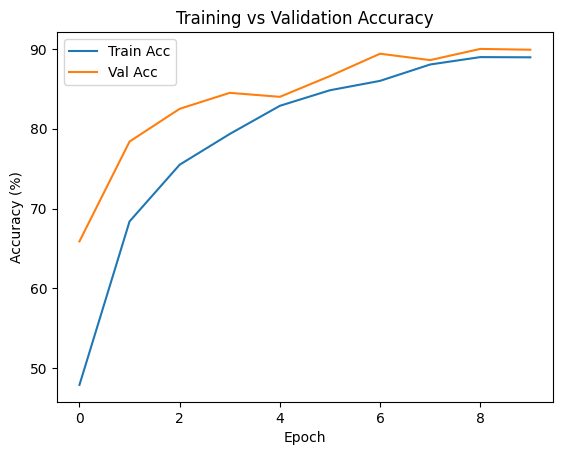

Model saved to plant_cnn.pth
Predicted Class: Tomato_Bacterial_spot


In [ ]:
# --------------------------------------------
# PlantVillage CNN Classifier + Prediction
# (PyTorch, Colab-ready)
# --------------------------------------------

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# -------------------------
# Imports
# -------------------------
import os
import json
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from PIL import Image

# -------------------------
# Config
# -------------------------
data_path = "/content/drive/MyDrive/archive/PlantVillage"
use_gray = False           # True = Grayscale, False = RGB
img_size = 128
batch_size = 32
epochs = 10
subset_size = 5000         # increase for better accuracy

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Training on:", device)

# -------------------------
# Transformations
# -------------------------
if use_gray:
    channels = 1
    transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((img_size, img_size)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ])
else:
    channels = 3
    transform = transforms.Compose([
        transforms.Resize((img_size, img_size)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
    ])

# -------------------------
# Dataset
# -------------------------
dataset = datasets.ImageFolder(root=data_path, transform=transform)

# Save class mapping
class_mapping = {i: c for i, c in enumerate(dataset.classes)}
with open("class_mapping.json", "w") as f:
    json.dump(class_mapping, f)
print("Classes saved to class_mapping.json")

# Reverse mapping for prediction
idx_to_class = {v: k for k, v in dataset.class_to_idx.items()}

# Subset for quick training
subset_size = min(subset_size, len(dataset))
small_dataset, _ = random_split(dataset, [subset_size, len(dataset)-subset_size])

# Train/val split
train_size = int(0.8 * len(small_dataset))
val_size = len(small_dataset) - train_size
train_dataset, val_dataset = random_split(small_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)

print("Number of classes:", len(dataset.classes))
print("Train samples:", len(train_dataset), "Val samples:", len(val_dataset))

# -------------------------
# CNN Model
# -------------------------
class SmallCNN(nn.Module):
    def __init__(self, num_classes, in_channels=3):
        super(SmallCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        # 128 -> 64 -> 32 -> 16 after 3 poolings
        self.fc1 = nn.Linear(128 * 16 * 16, 256)
        self.fc2 = nn.Linear(256, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.4)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))   # 128→64
        x = self.pool(self.relu(self.conv2(x)))   # 64→32
        x = self.pool(self.relu(self.conv3(x)))   # 32→16
        x = x.view(x.size(0), -1)                 # flatten
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# -------------------------
# Training Loop
# -------------------------
def train_model(model, train_loader, val_loader, epochs=10, lr=0.001):
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    history = {"train_acc": [], "val_acc": []}

    for epoch in range(epochs):
        # Training
        model.train()
        correct, total = 0, 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
        train_acc = 100 * correct / total

        # Validation
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()
        val_acc = 100 * correct / total

        history["train_acc"].append(train_acc)
        history["val_acc"].append(val_acc)

        print(f"Epoch [{epoch+1}/{epochs}] "
              f"Train Acc: {train_acc:.2f}% | Val Acc: {val_acc:.2f}%")

    return history

# -------------------------
# Run Training
# -------------------------
num_classes = len(dataset.classes)
model = SmallCNN(num_classes=num_classes, in_channels=channels)
history = train_model(model, train_loader, val_loader, epochs=epochs)

# -------------------------
# Plot Accuracy Curve
# -------------------------
plt.plot(history["train_acc"], label="Train Acc")
plt.plot(history["val_acc"], label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

# -------------------------
# Save Model
# -------------------------
save_path = "plant_cnn.pth"
torch.save(model.state_dict(), save_path)
print(f"Model saved to {save_path}")

# -------------------------
# Prediction Function
# -------------------------
def predict_image(model, image_path, transform, device):
    model.eval()
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0).to(device)  # batch size = 1

    with torch.no_grad():
        outputs = model(image)                # logits
        predicted_idx = outputs.argmax(dim=1).item()
        class_name = idx_to_class[predicted_idx]

    return class_name

# -------------------------
# Example Prediction
# -------------------------
test_image = "/content/drive/MyDrive/archive/PlantVillage/Tomato_Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG"
predicted_class = predict_image(model, test_image, transform, device)
print("Predicted Class:", predicted_class)


Mounted at /content/drive
Training on: cuda
Classes saved to class_mapping.json
Number of classes: 15
Train samples: 4000 Val samples: 1000
Epoch [1/10] Train Acc: 40.15% | Val Acc: 67.30%
Epoch [2/10] Train Acc: 64.53% | Val Acc: 70.80%
Epoch [3/10] Train Acc: 72.53% | Val Acc: 77.20%
Epoch [4/10] Train Acc: 77.05% | Val Acc: 80.90%
Epoch [5/10] Train Acc: 79.72% | Val Acc: 82.70%
Epoch [6/10] Train Acc: 80.78% | Val Acc: 82.20%
Epoch [7/10] Train Acc: 83.78% | Val Acc: 86.00%
Epoch [8/10] Train Acc: 85.50% | Val Acc: 87.40%
Epoch [9/10] Train Acc: 87.10% | Val Acc: 88.40%
Epoch [10/10] Train Acc: 87.35% | Val Acc: 85.80%


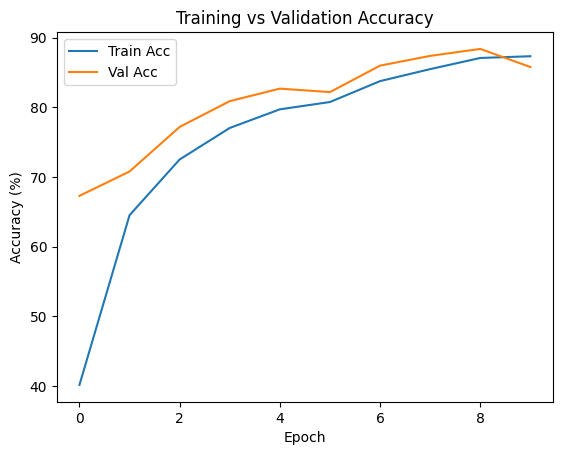

Model saved to plant_cnn.pth
Predicted Class: Tomato_Early_blight (confidence: 81.18%)


In [ ]:
# --------------------------------------------
# PlantVillage CNN Classifier + Prediction
# (PyTorch, Colab-ready)
# --------------------------------------------

from google.colab import drive
drive.mount('/content/drive')

import os
import json
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from PIL import Image

# -------------------------
# Config
# -------------------------
data_path = "/content/drive/MyDrive/archive/PlantVillage"
use_gray   = False
img_size   = 128
batch_size = 32
epochs     = 10
subset_size = 5000

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Training on:", device)

# -------------------------
# Transformations
# -------------------------
if use_gray:
    channels = 1
    transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((img_size, img_size)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ])
else:
    channels = 3
    transform = transforms.Compose([
        transforms.Resize((img_size, img_size)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
    ])

# -------------------------
# Dataset
# -------------------------
dataset = datasets.ImageFolder(root=data_path, transform=transform)

class_mapping = {i: c for i, c in enumerate(dataset.classes)}
with open("class_mapping.json", "w") as f:
    json.dump(class_mapping, f)
print("Classes saved to class_mapping.json")

idx_to_class = {v: k for k, v in dataset.class_to_idx.items()}

subset_size = min(subset_size, len(dataset))
small_dataset, _ = random_split(dataset, [subset_size, len(dataset)-subset_size])

train_size = int(0.8 * len(small_dataset))
val_size   = len(small_dataset) - train_size
train_dataset, val_dataset = random_split(small_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,
                          num_workers=2, pin_memory=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False,
                          num_workers=2, pin_memory=True)

print("Number of classes:", len(dataset.classes))
print("Train samples:", len(train_dataset), "Val samples:", len(val_dataset))

# -------------------------
# CNN Model
# -------------------------
class SmallCNN(nn.Module):
    def __init__(self, num_classes, in_channels=3):
        super(SmallCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool  = nn.MaxPool2d(2, 2)
        self.fc1   = nn.Linear(128 * 16 * 16, 256)
        self.fc2   = nn.Linear(256, num_classes)
        self.relu  = nn.ReLU()
        self.dropout = nn.Dropout(0.4)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)      # logits
        return x

# -------------------------
# Training Loop
# -------------------------
def train_model(model, train_loader, val_loader, epochs=10, lr=0.001):
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    history = {"train_acc": [], "val_acc": []}

    for epoch in range(epochs):
        model.train()
        correct, total = 0, 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
        train_acc = 100 * correct / total

        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()
        val_acc = 100 * correct / total

        history["train_acc"].append(train_acc)
        history["val_acc"].append(val_acc)

        print(f"Epoch [{epoch+1}/{epochs}] "
              f"Train Acc: {train_acc:.2f}% | Val Acc: {val_acc:.2f}%")

    return history

# -------------------------
# Run Training
# -------------------------
num_classes = len(dataset.classes)
model = SmallCNN(num_classes=num_classes, in_channels=channels)
history = train_model(model, train_loader, val_loader, epochs=epochs)

# -------------------------
# Plot Accuracy Curve
# -------------------------
plt.plot(history["train_acc"], label="Train Acc")
plt.plot(history["val_acc"], label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

# -------------------------
# Save Model
# -------------------------
save_path = "plant_cnn.pth"
torch.save(model.state_dict(), save_path)
print(f"Model saved to {save_path}")

# -------------------------
# Prediction Function
# -------------------------
def predict_image(model, image_path, transform, device):
    """Load a single image and return predicted class name and probability."""
    model.eval()
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(image)                      # logits
        predicted_idx = outputs.argmax(dim=1).item()
        probs = torch.softmax(outputs, dim=1)
        confidence = probs[0, predicted_idx].item()
        class_name = idx_to_class[predicted_idx]

    return class_name, confidence

# -------------------------
# Example Prediction with your image
# -------------------------
test_image = "/content/drive/MyDrive/archive/PlantVillage/Tomato_Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG"

predicted_class, conf = predict_image(model, test_image, transform, device)
print(f"Predicted Class: {predicted_class} (confidence: {conf:.2%})")



In [ ]:
def preprocess(example):
    # Convert numpy/list image to proper array
    img = example["image"]

    if isinstance(img, list):
        img = np.array(img, dtype=np.uint8)

    # Remove extra dimensions like (1,1,256,3) -> (256,256,3)
    img = np.squeeze(img)

    # Ensure it's a PIL image
    if not isinstance(img, Image.Image):
        img = Image.fromarray(img)

    # Apply image transform
    example["pixel_values"] = image_transform(img)

    # Tokenize text
    text = example["text"] if "text" in example else example["label"]
    tokens = tokenizer(
        text, padding="max_length", truncation=True, max_length=32
    )
    example["input_ids"] = tokens["input_ids"]
    example["attention_mask"] = tokens["attention_mask"]

    return example


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Training set
train_generator = datagen.flow_from_directory(
    "/content/drive/MyDrive/archive/PlantVillage",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

# Validation set
val_generator = datagen.flow_from_directory(
    "/content/drive/MyDrive/archive/PlantVillage",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)


Found 17934 images belonging to 15 classes.
Found 4477 images belonging to 15 classes.


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transforms
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5])
])

# Load dataset
train_dataset = datasets.ImageFolder(
    root="/content/drive/MyDrive/archive/PlantVillage",
    transform=transform
)

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Check sample
images, labels = next(iter(train_loader))
print("Batch image shape:", images.shape)
print("Batch label shape:", labels.shape)


Batch image shape: torch.Size([32, 3, 128, 128])
Batch label shape: torch.Size([32])


In [ ]:
import pandas as pd

df = pd.read_parquet("hf://datasets/ButterChicken98/plantvillage-image-text-pairs/data/train-00000-of-00001.parquet")

In [ ]:
import pandas as pd

# Load the parquet file
df = pd.read_parquet("hf://datasets/ButterChicken98/plantvillage-image-text-pairs/data/train-00000-of-00001.parquet")

# Save as CSV
df.to_csv("plantvillage_image_text_pairs.csv", index=False)

print("CSV file saved as plantvillage_image_text_pairs.csv")
print(df.head())


CSV file saved as plantvillage_image_text_pairs.csv
                                               image              caption  \
0  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...       Tomato healthy   
1  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...   Tomato Late blight   
2  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...       Tomato healthy   
3  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...  Tomato mosaic virus   
4  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...  Pepper bell healthy   

                                            captions  
0  [A vibrant green and healthy tomato leaf with ...  
1  [A tomato leaf showing dark brown lesions and ...  
2  [A vibrant green and healthy tomato leaf with ...  
3  [A tomato leaf with mosaic-like patterns of li...  
4  [A fresh green bell pepper leaf with a smooth,...  
